# Exploratory Data Analysis (EDA) – Spotify Project

In this stage I explore the cleaned dataset, generate reports, analyze distributions, and check for correlations between features.

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load prepared dataset from pickle (created in Stage 1)
df = pd.read_pickle("/content/drive/MyDrive/pickle_files/spotify_flat_file.pkl")

print("Shape:", df.shape)
df.head()


Mounted at /content/drive
Shape: (32833, 25)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,i dont care with justin bieber loud luxury remix,ed sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,i dont care with justin bieber loud luxury remix,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,memories dillon francis remix,maroon 5,67,63rPSO264uRjW1X5E6cWv6,memories dillon francis remix,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,all the time don diablo remix,zara larsson,70,1HoSmj2eLcsrR0vE9gThr4,all the time don diablo remix,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7
3,75FpbthrwQmzHlBJLuGdC7,call you mine keanu silva remix,the chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,call you mine the remixes,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,someone you loved future humans remix,lewis capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,someone you loved future humans remix,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3


In [2]:
# General info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  string        
 1   track_name                32828 non-null  string        
 2   track_artist              32828 non-null  string        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  string        
 5   track_album_name          32828 non-null  string        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  string        
 8   playlist_id               32833 non-null  string        
 9   playlist_genre            32833 non-null  string        
 10  playlist_subgenre         32833 non-null  string        
 11  danceability              32833 non-null  float64       
 12  energy            

# 1. Data Protocol

In [3]:
# Spotify Dataset Documentation Export
# Exports key dataset summaries into one Excel file


output_file = "spotify_data_summary.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    # Data types of each column
    df.dtypes.to_excel(writer, sheet_name="data_types")

    # Maximum values (numeric only)
    df.max(numeric_only=True).to_excel(writer, sheet_name="max_values")

    # Minimum values (numeric only)
    df.min(numeric_only=True).to_excel(writer, sheet_name="min_values")

    # Count of missing (NaN) values per column
    df.isnull().sum(axis=0).to_excel(writer, sheet_name="missing_values")

    # Number of unique values per column
    df.nunique().to_excel(writer, sheet_name="unique_counts")

    # Basic statistical summary for numeric columns
    df.describe().to_excel(writer, sheet_name="numeric_summary")

print(f"✅ Spotify dataset summary exported successfully to '{output_file}'")


✅ Spotify dataset summary exported successfully to 'spotify_data_summary.xlsx'


## ydata_profiling reports HTML Reprots

In [5]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from google.colab import files

profile = ProfileReport(df, title="Spotify EDA Profiling", explorative=True)
profile.to_file("EDA_Report_spotify.html")

# Auto Download
files.download("EDA_Report_spotify.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:05<00:00,  4.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# 2. Overview of the dataset: structure, summary statistics, and missing values.

In [ ]:
# Summary statistics for numeric columns
df.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month
count,32833.000000,30947,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,30947.0,30947.0
mean,42.477081,2012-09-09 04:27:27.668594688,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622,2012.200536,6.453873
min,0.000000,1957-01-01 00:00:00,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.0,1.0
25%,24.000000,2010-12-04 00:00:00,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000,2010.0,3.0
50%,45.000000,2017-01-27 00:00:00,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2017.0,7.0
75%,62.000000,2019-05-16 00:00:00,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000,2019.0,10.0
max,100.000000,2020-01-29 00:00:00,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.0,12.0
std,24.984074,NaN,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182,10.397763,3.727488


In [ ]:
#Check for duplicate rows of data
df.duplicated().any()

np.False_

In [ ]:
#Check for Cardinality
df.nunique()

,0
track_id,28356
track_name,22801
track_artist,4551
track_popularity,101
track_album_id,22545
track_album_name,19331
track_album_release_date,4453
playlist_name,312
playlist_id,471
playlist_genre,6


In [ ]:
# Missing values
df.isnull().sum().sort_values(ascending=False)


,0
track_album_release_date,1886
release_year,1886
release_month,1886
track_album_name,5
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_id,0
playlist_id,0


In [ ]:
# Check- which observations are these
df[df['track_artist'].isna()==True]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month
8151,69gRFGOWY9OMpFJgFol1u0,<NA>,<NA>,0,717UG2du6utFe7CdmpuUe3,<NA>,2012-01-05,hiphop,5DyJsJZOpMJh34WvUrQzMV,rap,...,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012,1
9282,5cjecvX0CmC9gK0Laf5EMQ,<NA>,<NA>,0,3luHJEPw434tvNbme3SP8M,<NA>,2017-12-01,gangsta rap,5GA8GDo7RQC3JEanT81B3g,rap,...,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,2017,12
9283,5TTzhRSWQS4Yu8xTgAuq6D,<NA>,<NA>,0,3luHJEPw434tvNbme3SP8M,<NA>,2017-12-01,gangsta rap,5GA8GDo7RQC3JEanT81B3g,rap,...,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,2017,12
19568,3VKFip3OdAvv4OfNTgFWeQ,<NA>,<NA>,0,717UG2du6utFe7CdmpuUe3,<NA>,2012-01-05,reggaeton viejito,0si5tw70PIgPkY1Eva6V8f,latin,...,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,2012,1
19811,69gRFGOWY9OMpFJgFol1u0,<NA>,<NA>,0,717UG2du6utFe7CdmpuUe3,<NA>,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012,1


In [ ]:
# Display all rows where the 'release_year' column has missing (NaN) values
df[df['release_year'].isna()==True]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month
151,2QtJA4gbwe1AcanB2p21aP,stay the night featuring hayley williams of pa...,zedd,61,4xak0izXQHOMV9Wu1mDAAy,clarity deluxe,NaT,dance pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347,<NA>,<NA>
749,77j9HOrxUpWcjwra9jgvio,we like to party six flags,vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,we like to party the vengabus,NaT,90s dance hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227,<NA>,<NA>
750,6rQ9qJPvInEqSzlh89LsPJ,coco jamboo radio version,mr president,18,2t8Bc4qBseswbwOoHGHK8d,we see the same sun,NaT,90s dance hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733,<NA>,<NA>
751,5FgtdSf7I5lClThz2ptWvl,blue da ba dee,eiffel 65,16,65DySolRDG1LNSvRXcWQWN,europop,NaT,90s dance hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748,<NA>,<NA>
753,2ahnofp2LbBWDXcJbMaSTu,what is love,haddaway,70,0qTVjeVP70YvQG4GctetOf,what is love remix,NaT,90s dance hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,faith radio edit,blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,faith,NaT,gym melbourne bounceprogressive house,5BqOZpVEqRDfZScvW1QUyA,edm,...,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067,<NA>,<NA>
32767,1h7LBCgfnSUEe7qXRbwMIp,push play,zedd,39,4xak0izXQHOMV9Wu1mDAAy,clarity deluxe,NaT,edm love 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360,<NA>,<NA>
32774,1NtVWYw9QDr30Ei0phACni,lessons in love feat neon trees,kaskade,23,7r47EiktL01BmvI7NHdgcA,fire ice,NaT,edm love 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693,<NA>,<NA>
32775,454ZIylnCq09ONjQE4EJ6a,turn it down with rebecca fiona radio edit,kaskade,13,0xiigD6kCGMSv9CcSpJFUr,i love you man bonus track version,NaT,edm love 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360,<NA>,<NA>


In [ ]:
# Drop irrelevant columns from the dataset

# These columns are removed because:
# - 'track_id' and 'track_album_id' are unique identifiers and carry no predictive information.
# - 'playlist_id' serves as a unique identifier associated with the existing 'playlist_name' feature.
# - 'track_album_release_date' is dropped because we already extracted 'release_year' and 'release_month'.

df_clean = df.drop(columns=["track_id", "track_album_id", "track_album_release_date", "playlist_id"])

# Quick check to verify they are removed
print("Remaining columns:", df_clean.columns)


Remaining columns: Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'playlist_name', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'release_year', 'release_month'],
      dtype='object')


In [ ]:
# Save the cleaned dataframe to a new pickle file

df_clean.to_pickle("spotify_df_clean.pkl")

print("✅ Cleaned dataset saved successfully as 'spotify_df_clean.pkl'")


✅ Cleaned dataset saved successfully as 'spotify_df_clean.pkl'


In [ ]:
# Step 1: Drop rows with missing track info (only 5 rows)
before_drop = df_clean.shape[0]
df_clean = df_clean.dropna(subset=["track_name", "track_artist", "track_album_name"])
after_drop = df_clean.shape[0]

dropped_rows_1 = before_drop - after_drop
pct_dropped_1 = (dropped_rows_1 / before_drop) * 100

print(f"✅ Step 1: Removed {dropped_rows_1} rows ({pct_dropped_1:.2f}%) due to missing track info.")


# Step 2: Drop rows with missing release date info (year/month)
before_drop_2 = df_clean.shape[0]
df_clean = df_clean.dropna(subset=["release_year", "release_month"])
after_drop_2 = df_clean.shape[0]

dropped_rows_2 = before_drop_2 - after_drop_2
pct_dropped_2 = (dropped_rows_2 / before_drop_2) * 100

print(f"✅ Step 2: Removed {dropped_rows_2} rows ({pct_dropped_2:.2f}%) due to missing release date info.")


# Final check
print("📊 Final shape of the cleaned dataset:", df_clean.shape)
print("\nRemaining missing values:")
print(df_clean.isna().sum())


✅ Step 1: Removed 5 rows (0.02%) due to missing track info.
✅ Step 2: Removed 1886 rows (5.75%) due to missing release date info.
📊 Final shape of the cleaned dataset: (30942, 21)

Remaining missing values:
track_name           0
track_artist         0
track_popularity     0
track_album_name     0
playlist_name        0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
release_year         0
release_month        0
dtype: int64


In [ ]:
# Save the fully cleaned dataset to a new pickle file

# This version is ready for EDA, feature engineering, and modeling
df_clean.to_pickle("spotify_df_clean_na.pkl")

print("💾 Cleaned dataset saved successfully as 'spotify_df_clean_na.pkl'")


💾 Cleaned dataset saved successfully as 'spotify_df_clean_na.pkl'


# 3. Categorial Data

playlist_genre: 6 unique categories
playlist_subgenre: 24 unique categories
mode: 2 unique categories


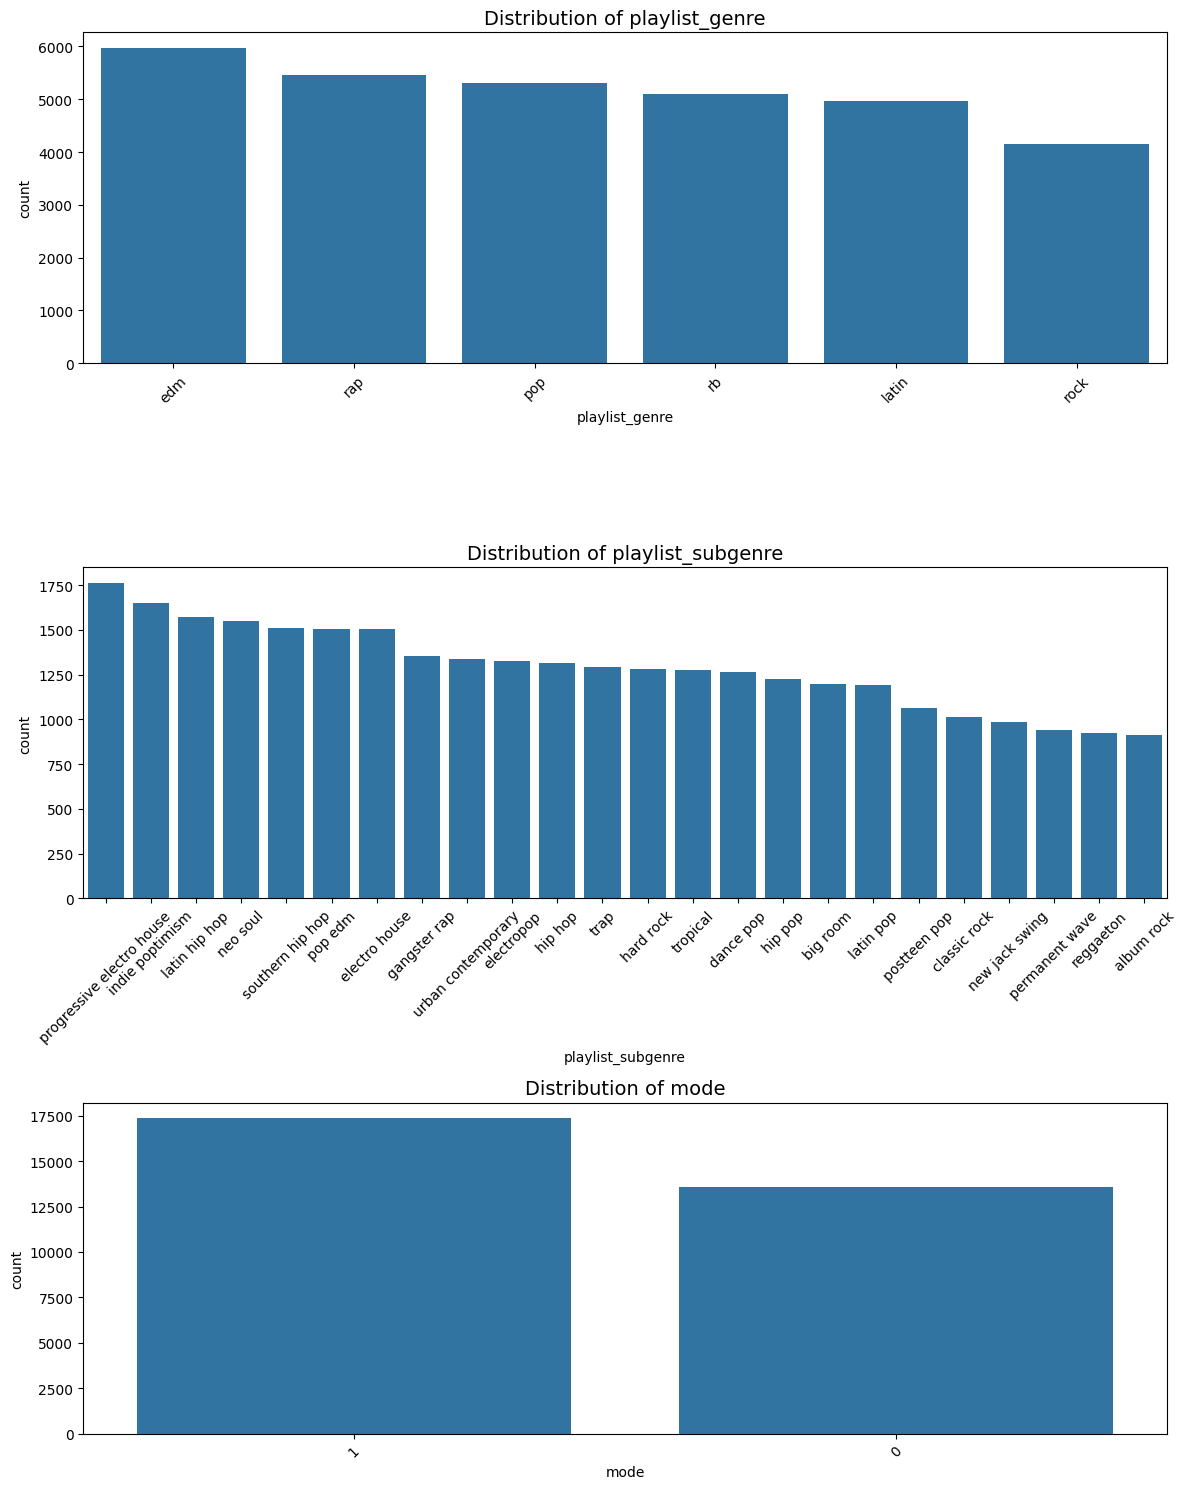

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert relevant columns to 'category' type
categorical_cols = ["playlist_genre", "playlist_subgenre", "mode"]
df_clean[categorical_cols] = df_clean[categorical_cols].astype("category")

# Filter categorical columns
categorical_df = df_clean.select_dtypes(include=["category"])

# Display number of categories per column
for col in categorical_df.columns:
    print(f"{col}: {categorical_df[col].nunique()} unique categories")

# Plot count distributions for each categorical feature
fig, axes = plt.subplots(nrows=len(categorical_df.columns), ncols=1, figsize=(12, 5*len(categorical_df.columns)))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(categorical_df.columns):
    sns.countplot(data=categorical_df, x=col, order=categorical_df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30942 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   track_name         30942 non-null  string  
 1   track_artist       30942 non-null  string  
 2   track_popularity   30942 non-null  int64   
 3   track_album_name   30942 non-null  string  
 4   playlist_name      30942 non-null  string  
 5   playlist_genre     30942 non-null  category
 6   playlist_subgenre  30942 non-null  category
 7   danceability       30942 non-null  float64 
 8   energy             30942 non-null  float64 
 9   key                30942 non-null  int64   
 10  loudness           30942 non-null  float64 
 11  mode               30942 non-null  category
 12  speechiness        30942 non-null  float64 
 13  acousticness       30942 non-null  float64 
 14  instrumentalness   30942 non-null  float64 
 15  liveness           30942 non-null  float64 
 16  valence  

# 3.1 Overview on Target Value


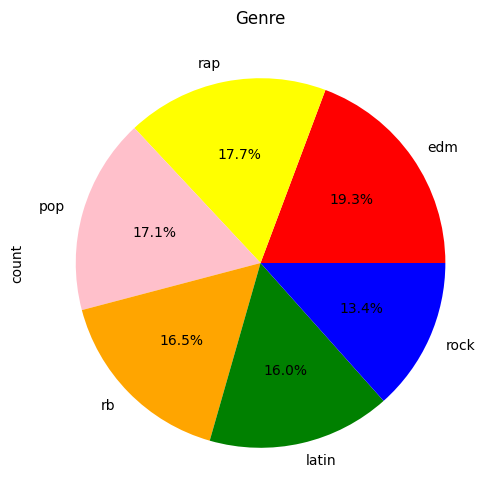

In [ ]:
##What is the Distribution of Genre in the Data? Which genre has maximum songs?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for the slices

custom_colors = ['red', 'yellow', 'pink', 'orange', 'green','blue',]
paper = plt.figure(figsize=[10,6])
df_clean['playlist_genre'].value_counts().plot.pie(autopct='%3.1f%%',colors=custom_colors)
plt.title('Genre')
plt.show()

In [ ]:
genre_means = df_clean.groupby("playlist_genre")[["danceability", "energy", "valence", "acousticness"]].mean()
print(genre_means)


                danceability    energy   valence  acousticness
playlist_genre                                                
edm                 0.654640  0.802928  0.398450      0.081672
latin               0.713475  0.707590  0.602673      0.211113
pop                 0.640651  0.698324  0.500412      0.173026
rap                 0.717572  0.650206  0.500099      0.196062
rb                  0.669715  0.588902  0.523655      0.262976
rock                0.520199  0.738511  0.531114      0.140004


/tmp/ipython-input-918836582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_means = df_clean.groupby("playlist_genre")[["danceability", "energy", "valence", "acousticness"]].mean()


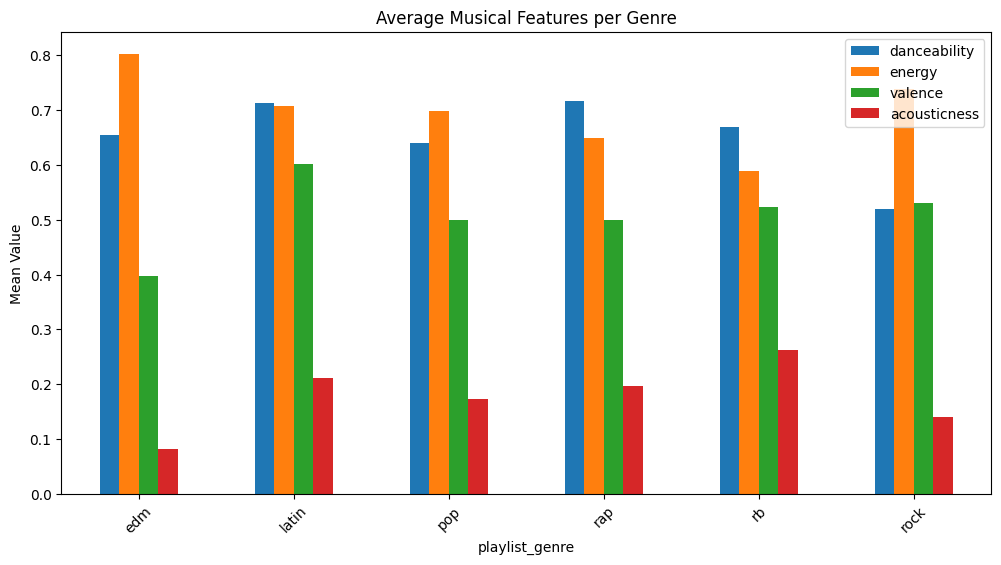

In [ ]:
genre_means.plot(kind="bar", figsize=(12,6))
plt.title("Average Musical Features per Genre")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()


## 3.2 Overview on Subgenre

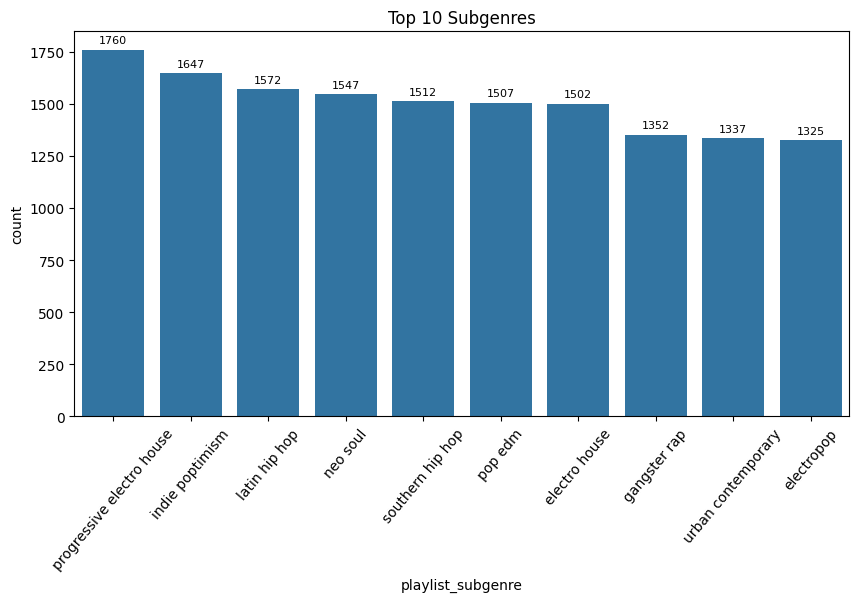

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df_clean,
    x="playlist_subgenre",
    order=df_clean["playlist_subgenre"].value_counts().index[:10]
)

plt.title("Top 10 Subgenres")
plt.xticks(rotation=50)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)

plt.show()


In [ ]:
df_clean['playlist_subgenre'].value_counts()

,count
playlist_subgenre,
progressive electro house,1760
indie poptimism,1647
latin hip hop,1572
neo soul,1547
southern hip hop,1512
pop edm,1507
electro house,1502
gangster rap,1352
urban contemporary,1337


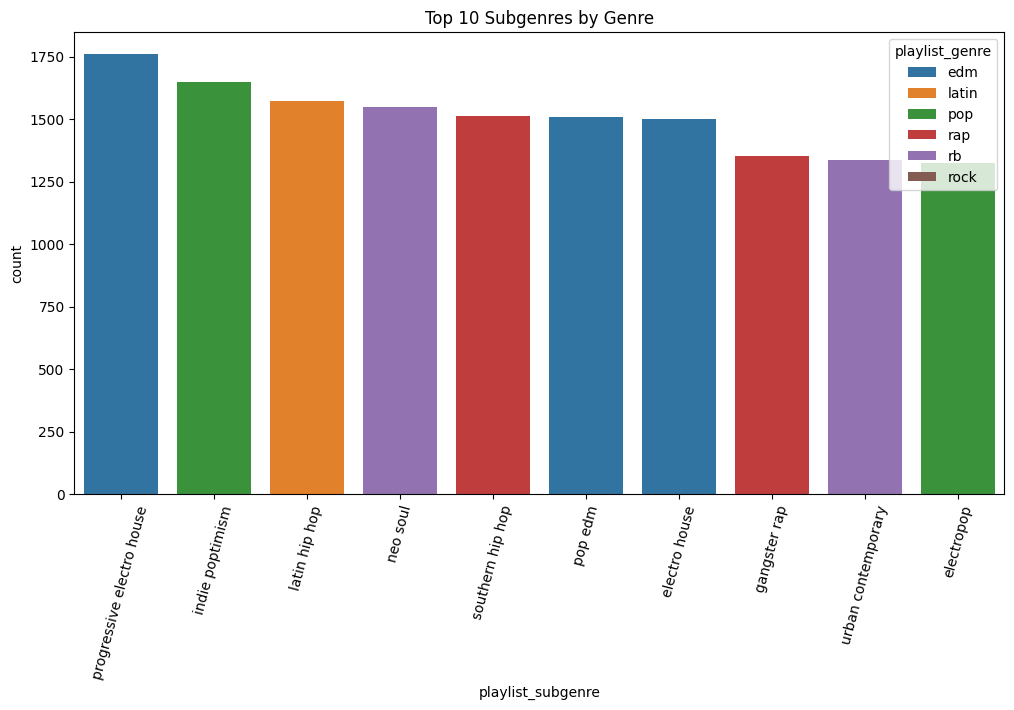

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x="playlist_subgenre", hue="playlist_genre",
              order=df_clean["playlist_subgenre"].value_counts().index[:10])
plt.title("Top 10 Subgenres by Genre")
plt.xticks(rotation=75)
plt.show()


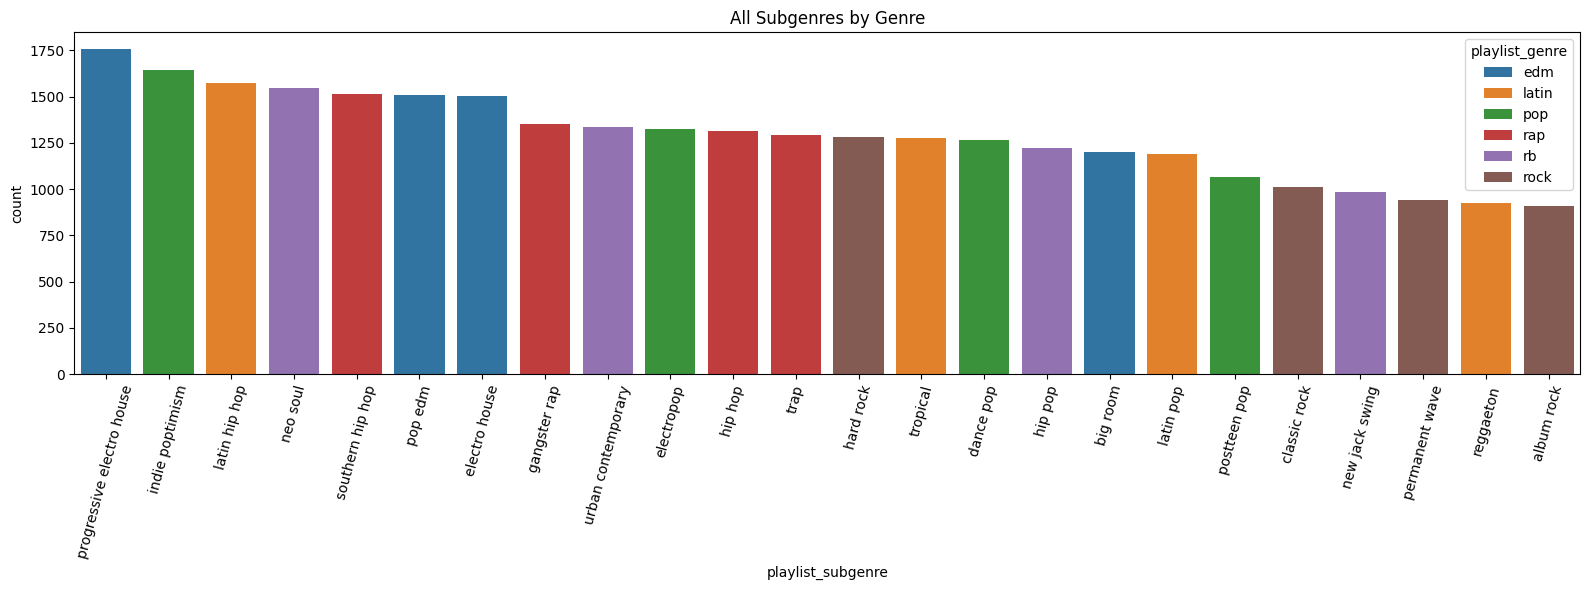

In [ ]:
order_all = df_clean["playlist_subgenre"].value_counts().index  # all subgenres, sorted by count

plt.figure(figsize=(16,6))
sns.countplot(
    data=df_clean,
    x="playlist_subgenre",
    hue="playlist_genre",
    order=order_all
)
plt.title("All Subgenres by Genre")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [ ]:
### Relationship Between Subgenre and Genre (Crosstab Normalized by Subgenre)

pd.crosstab(df_clean['playlist_subgenre'], df_clean['playlist_genre'], normalize='index')


playlist_genre,edm,latin,pop,rap,rb,rock
playlist_subgenre,,,,,,
album rock,0.0,0.0,0.0,0.0,0.0,1.0
big room,1.0,0.0,0.0,0.0,0.0,0.0
classic rock,0.0,0.0,0.0,0.0,0.0,1.0
dance pop,0.0,0.0,1.0,0.0,0.0,0.0
electro house,1.0,0.0,0.0,0.0,0.0,0.0
electropop,0.0,0.0,1.0,0.0,0.0,0.0
gangster rap,0.0,0.0,0.0,1.0,0.0,0.0
hard rock,0.0,0.0,0.0,0.0,0.0,1.0
hip hop,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Calculate the cumulative distribution of playlist subgenres (as proportions)
sub_counts = df_clean['playlist_subgenre'].value_counts(normalize=True).cumsum()

# Display the cumulative percentage of subgenres
sub_counts


,proportion
playlist_subgenre,
progressive electro house,0.056881
indie poptimism,0.110109
latin hip hop,0.160914
neo soul,0.210911
southern hip hop,0.259776
pop edm,0.308480
electro house,0.357023
gangster rap,0.400717
urban contemporary,0.443927


In [ ]:
# Define the list of dominant subgenres (based on high proportion)
dominant_list = [
    "postteen pop",
    "classic rock",
    "new jack swing",
    "permanent wave",
    "reggaeton",
    "album rock"
]

# Replace them with a single category name
df_clean["playlist_subgenre_simplified"] = df_clean["playlist_subgenre"].apply(
    lambda x: "dominant_genre" if x in dominant_list else x
)

# Quick check
print(df_clean["playlist_subgenre_simplified"].value_counts().head(10))


playlist_subgenre_simplified
dominant_genre               5841
progressive electro house    1760
indie poptimism              1647
latin hip hop                1572
neo soul                     1547
southern hip hop             1512
pop edm                      1507
electro house                1502
gangster rap                 1352
urban contemporary           1337
Name: count, dtype: Int64


In [ ]:
print(df_clean["playlist_subgenre"].nunique())
print(df_clean["playlist_subgenre_simplified"].nunique())


24
19


In [ ]:
# Drop the original 'playlist_subgenre' column after creating the simplified version

df_clean = df_clean.drop(columns=["playlist_subgenre"])

# Quick check to verify it was removed
print("Remaining columns:", df_clean.columns)


Remaining columns: Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'playlist_name', 'playlist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'release_year',
       'release_month', 'playlist_subgenre_simplified'],
      dtype='object')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30942 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   track_name                    30942 non-null  string  
 1   track_artist                  30942 non-null  string  
 2   track_popularity              30942 non-null  int64   
 3   track_album_name              30942 non-null  string  
 4   playlist_name                 30942 non-null  string  
 5   playlist_genre                30942 non-null  category
 6   danceability                  30942 non-null  float64 
 7   energy                        30942 non-null  float64 
 8   key                           30942 non-null  int64   
 9   loudness                      30942 non-null  float64 
 10  mode                          30942 non-null  category
 11  speechiness                   30942 non-null  float64 
 12  acousticness                  30942 non-null  float

In [ ]:
# Convert the column to category type
df_clean["playlist_subgenre_simplified"] = df_clean["playlist_subgenre_simplified"].astype("category")

# Quick check
print(df_clean["playlist_subgenre_simplified"].dtypes)


category


In [ ]:
# Save to pickle dataframe
df_clean.to_pickle("after_subgenre_simplified.pkl")

## 3.3 Chi-Square Test of Independence – Relationship Between Genre and Subgenre


In [ ]:
# Import the chi-squared test function
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) between genre and subgenre
contingency = pd.crosstab(df_clean["playlist_genre"], df_clean["playlist_subgenre_simplified"])
chi2, p, dof, expected = chi2_contingency(contingency)
contingency



playlist_subgenre_simplified,big room,dance pop,dominant_genre,electro house,electropop,gangster rap,hard rock,hip hop,hip pop,indie poptimism,latin hip hop,latin pop,neo soul,pop edm,progressive electro house,southern hip hop,trap,tropical,urban contemporary
playlist_genre,,,,,,,,,,,,,,,,,,,
edm,1200,0,0,1502,0,0,0,0,0,0,0,0,0,1507,1760,0,0,0,0
latin,0,0,925,0,0,0,0,0,0,0,1572,1190,0,0,0,0,0,1274,0
pop,0,1265,1066,0,1325,0,0,0,0,1647,0,0,0,0,0,0,0,0,0
rap,0,0,0,0,0,1352,0,1313,0,0,0,0,0,0,0,1512,1291,0,0
rb,0,0,985,0,0,0,0,0,1225,0,0,0,1547,0,0,0,0,0,1337
rock,0,0,2865,0,0,0,1282,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display Chi-square test results
chi2, p, dof, expected

# Print Chi-square test results in a readable format
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.5f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 128904.059
p-value: 0.00000
Degrees of freedom: 90
Expected frequencies table:
[[ 231.49117704  244.03028246 1126.78330425  289.74978993  255.60484132
   260.8133928   247.30974081  253.28992955  236.3139099   317.72164049
   303.25344192  229.5620839   298.43070907  290.7143365   339.52039299
   291.67888307  249.04592463  245.76646629  257.91975309]
 [ 192.3986814   202.82027665  936.50058173  240.81901622  212.44021072
   216.76918105  205.54592463  210.5162239   196.40698727  264.06719023
   252.04227264  190.79535906  248.03396678  241.6206774   282.18473273
   242.42233857  206.98891474  204.26326676  214.36419753]
 [ 205.66220671  216.80224291 1001.06079116  257.42052873  227.08535324
   231.71275289  219.71579083  225.02873117  209.94683602  282.27137871
   269.41749079  203.94835499  265.13286148  258.27745459  301.63790317
   259.13438045  221.25825738  218.34470946  229.14197531]
 [ 212.06127594  223.54792838 1032.20826062  265.43003038  234.15099218
  

### Chi-Square Findings (Genre × Subgenre)

I tested the association between `playlist_genre` and `playlist_subgenre_simplified`.
The results show **χ² ≈ 128,904.059**, **dof = 90**, **p-value ≈ 0.0000**, indicating a **statistically significant dependency**: subgenres are not independent of genres (as expected, since subgenres are nested within genres).

**Implications for modeling:**  
- When predicting **genre**, including subgenre (especially the detailed one) may introduce redundancy or label leakage.  
- However, when predicting **subgenre**, the main playlist_genre serves as a useful and valid feature, providing contextual information that helps the model distinguish between subgenre categories.




## 4. Numeric Features

In [ ]:
# Explore numeric features: check missing values, zeros, and outliers

# Define numeric columns
numeric_cols = ["danceability","energy","valence","acousticness",
                "tempo","loudness","speechiness","instrumentalness",
                "liveness","duration_ms", "release_month", "release_year",
                "key","track_popularity"]


for col in numeric_cols:
    s = df_clean[col]
    n = len(s)
    nonnull = s.notna().sum()
    missing = s.isna().sum()

   # Count zeros only if the column is numeric
    if pd.api.types.is_numeric_dtype(s):
        zeros = (s == 0).sum()
    else:
        zeros = np.nan

    # Calculate the interquartile range (IQR) to detect potential outliers
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((s < lo) | (s > hi)).sum()

    print(f"\n=== Numeric feature: {col} ===")
    print(f"dtype:           {s.dtype}")
    print(f"count:           {nonnull}/{n}  |  missing: {missing} ({missing/n*100:.2f}%)")
    print(f"unique:          {s.nunique(dropna=True)}")
    print(f"zeros:           {zeros} ({zeros/n*100:.2f}%)" if not pd.isna(zeros) else "zeros: n/a")
    print(f"min / q1 / med / mean / q3 / max:")
    print(f"{s.min():.3f}  {q1:.3f}  {s.median():.3f}  {s.mean():.3f}  {q3:.3f}  {s.max():.3f}")
    print(f"std: {s.std():.3f}  |  skew: {s.skew():.3f}")
    print(f"IQR bounds: [{lo:.3f}, {hi:.3f}]  |  outliers: {outliers} ({outliers/nonnull*100:.2f}%)")




=== Numeric feature: danceability ===
dtype:           float64
count:           30942/30942  |  missing: 0 (0.00%)
unique:          817
zeros:           1 (0.00%)
min / q1 / med / mean / q3 / max:
0.000  0.566  0.674  0.657  0.762  0.983
std: 0.144  |  skew: -0.514
IQR bounds: [0.272, 1.056]  |  outliers: 299 (0.97%)

=== Numeric feature: energy ===
dtype:           float64
count:           30942/30942  |  missing: 0 (0.00%)
unique:          949
zeros:           0 (0.00%)
min / q1 / med / mean / q3 / max:
0.000  0.582  0.721  0.699  0.840  1.000
std: 0.181  |  skew: -0.637
IQR bounds: [0.195, 1.227]  |  outliers: 272 (0.88%)

=== Numeric feature: valence ===
dtype:           float64
count:           30942/30942  |  missing: 0 (0.00%)
unique:          1356
zeros:           1 (0.00%)
min / q1 / med / mean / q3 / max:
0.000  0.326  0.506  0.505  0.687  0.991
std: 0.233  |  skew: 0.014
IQR bounds: [-0.216, 1.229]  |  outliers: 0 (0.00%)

=== Numeric feature: acousticness ===
dtype:       

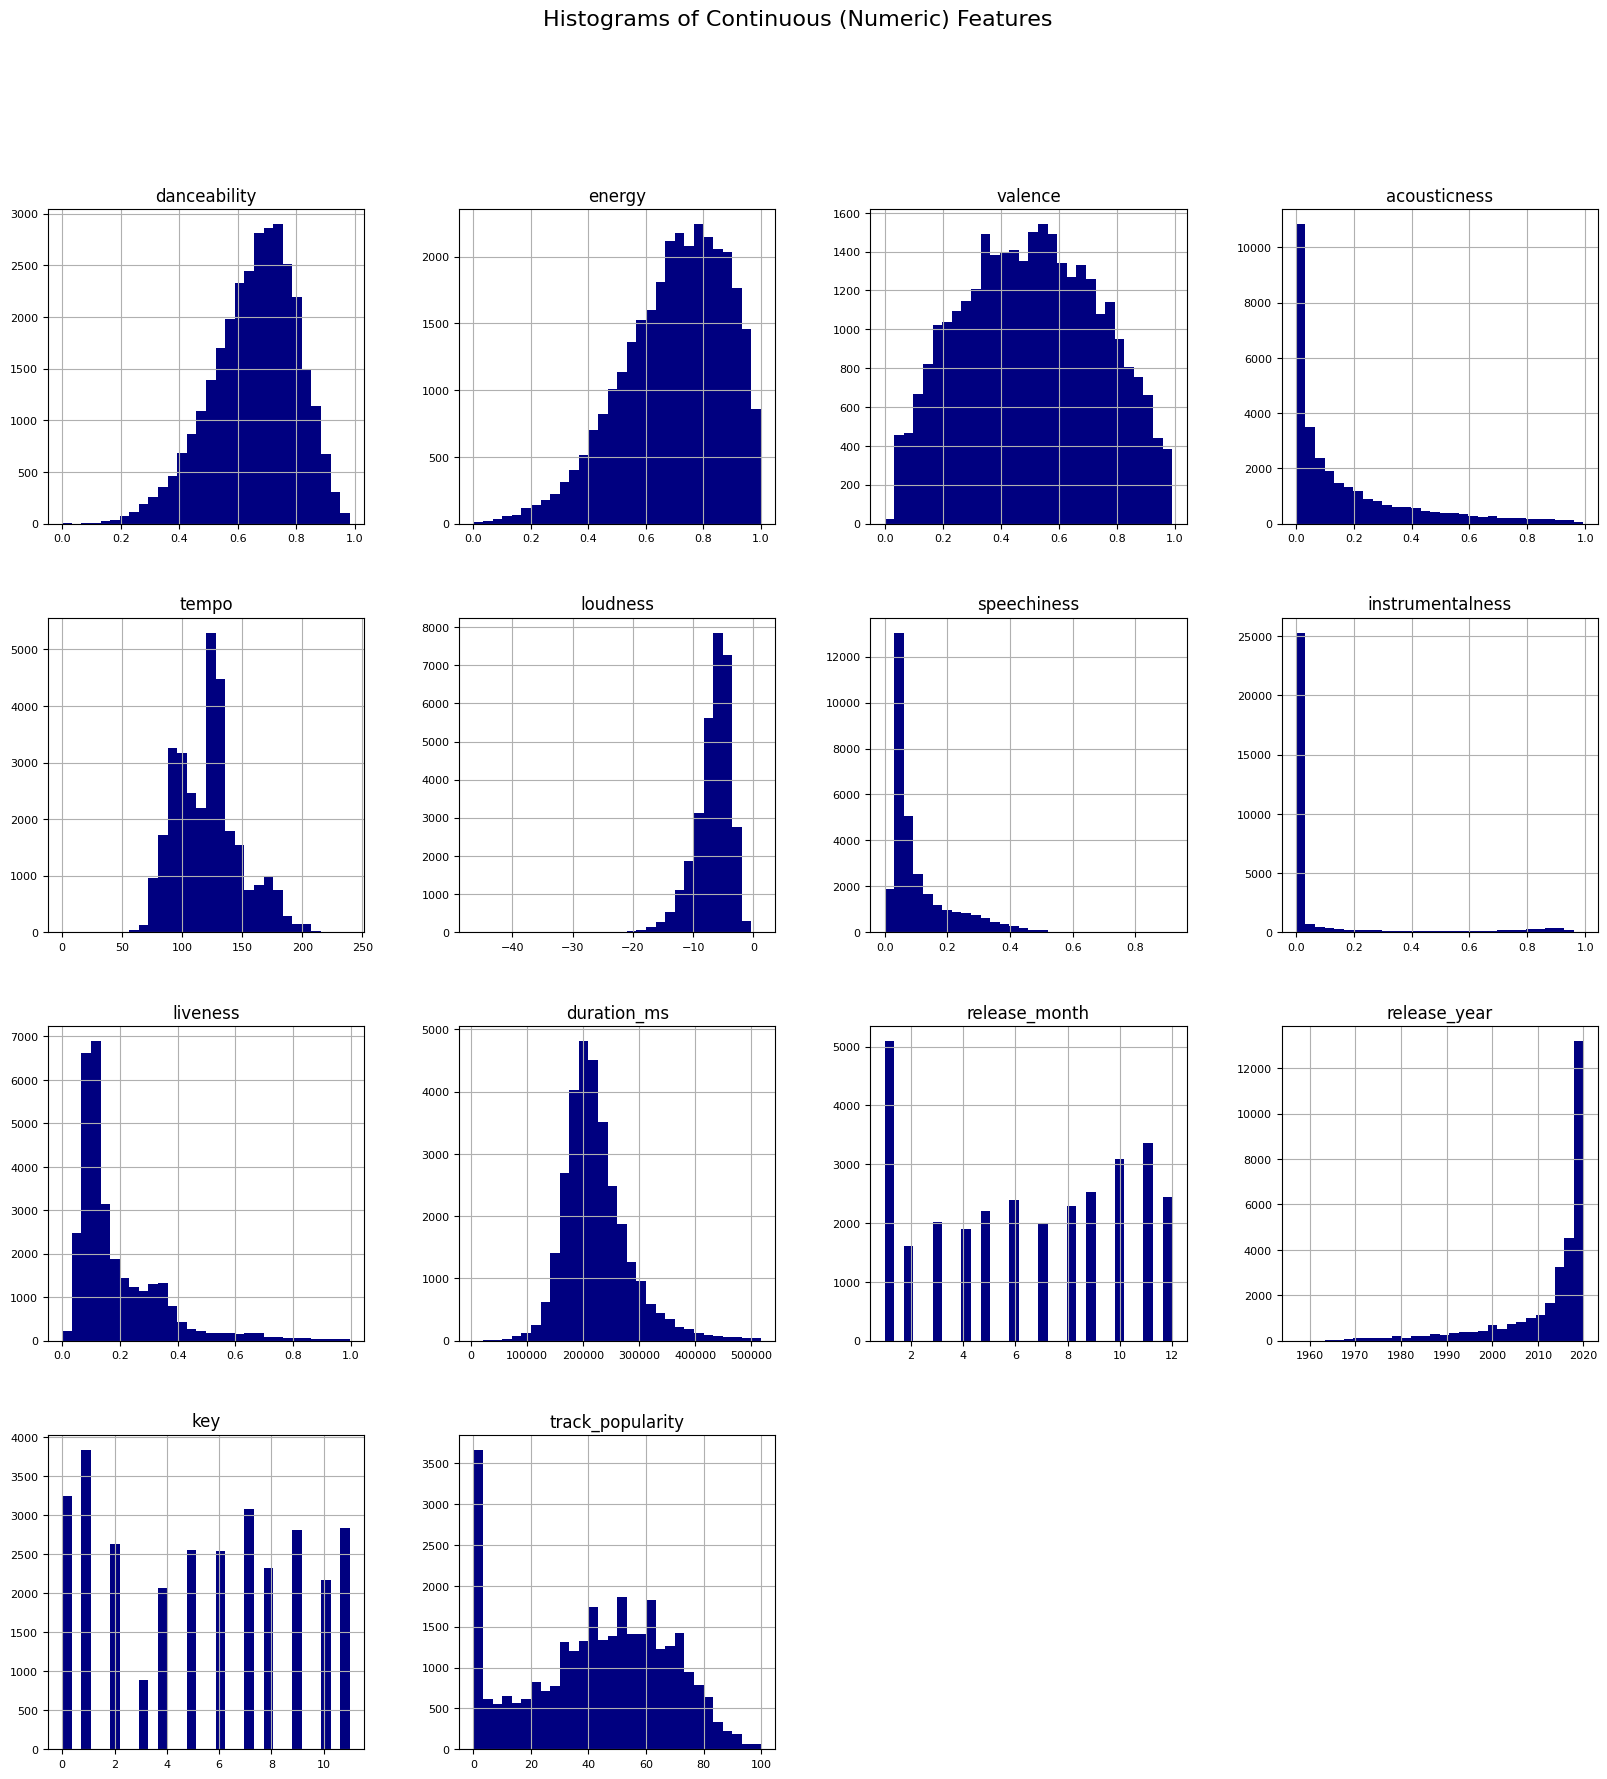

/tmp/ipython-input-2501066133.py:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  skewness_df.style.applymap(highlight)


,skewness
instrumentalness,2.709762
liveness,2.095760
speechiness,1.944476
acousticness,1.594463
duration_ms,1.169463
tempo,0.525084
valence,0.013584
key,-0.019212
release_month,-0.103517
track_popularity,-0.233573


In [ ]:
con_df = df_clean[numeric_cols]

# 1. Histograms for numeric features
con_df.hist(figsize=(20, 20), bins=30, color="navy", xlabelsize=8, ylabelsize=8)
plt.suptitle("Histograms of Continuous (Numeric) Features", fontsize=16)
plt.show()

# 2. Skewness calculation
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight  # high positive skew
    elif cell_value < -1:
        return negative    # high negative skew
    else:
        return ''

skewness_df = pd.DataFrame(con_df.skew(), columns=['skewness']).sort_values(by='skewness', ascending=False)
skewness_df.style.applymap(highlight)


### Skewness Analysis - Continuous Features

The skewness results indicate that most numerical features are **not normally distributed**.  
Features such as `instrumentalness`, `liveness`, `speechiness`, `acousticness`, and `duration_ms` are **right-skewed**

In contrast, `loudness` and `release_year` are **left-skewed**, showing that most tracks are loud and from recent years.  
Only a few features like `tempo`, `valence` and `key` appear approximately symmetric, suggesting near-normal distributions.  

Overall, the data shows non-normal patterns typical for musical characteristics, which may later require transformation (e.g., log or robust scaling) before modeling.


## 5. Relationship Between Categorical and Numerical Features


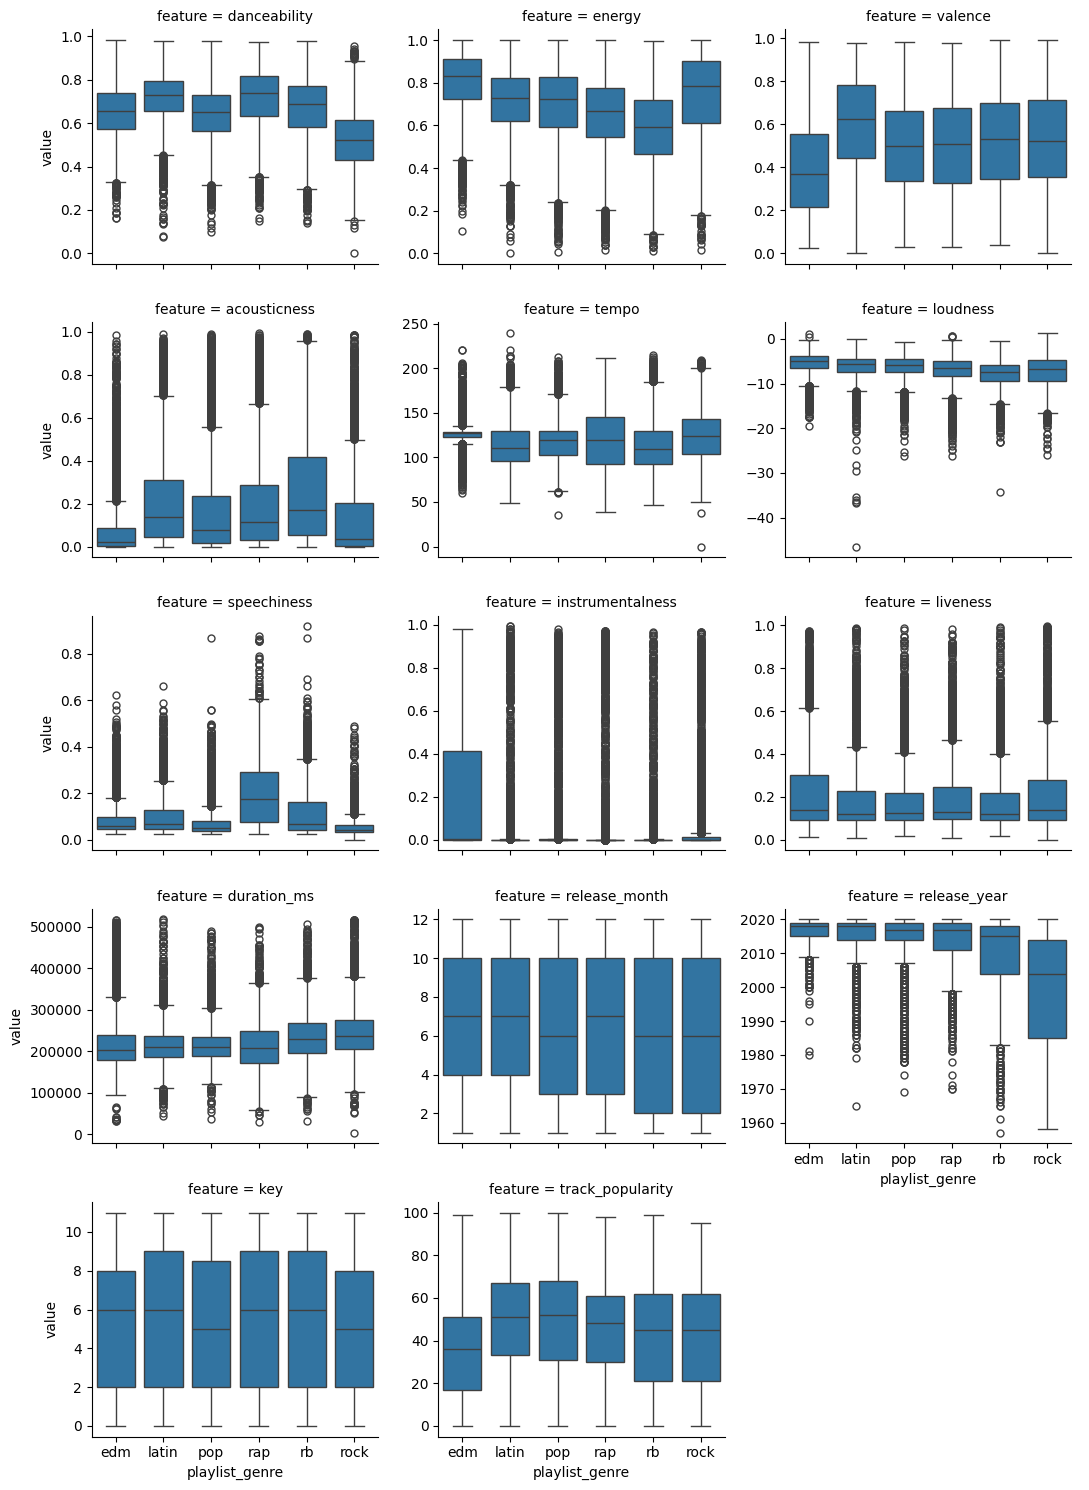

In [ ]:
# Compare distributions of all numeric features across genres in one go

melted = df_clean.melt(id_vars="playlist_genre",
                       value_vars=numeric_cols,
                       var_name="feature",
                       value_name="value")

sns.catplot(data=melted, x="playlist_genre", y="value",
            col="feature", col_wrap=3, kind="box",
            sharey=False, height=3, aspect=1.2)
plt.tight_layout()


### 🎵 Violin Plots for Key Audio Features

Violin plots were chosen to better illustrate how each audio feature is distributed across genres.  
Unlike boxplots, they show both the **statistical range** and the **density shape** of the data — revealing whether values cluster tightly or spread widely.  
This helps highlight subtle genre differences in features such as **energy**, **danceability**, **acousticness**, **valence**, and **tempo** that might be hidden in summary boxplots.


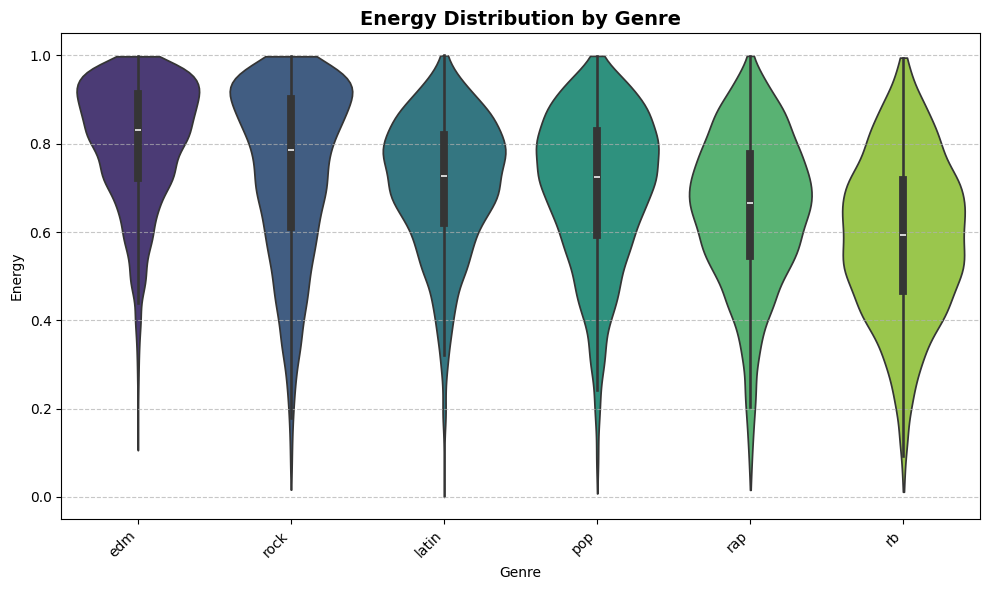

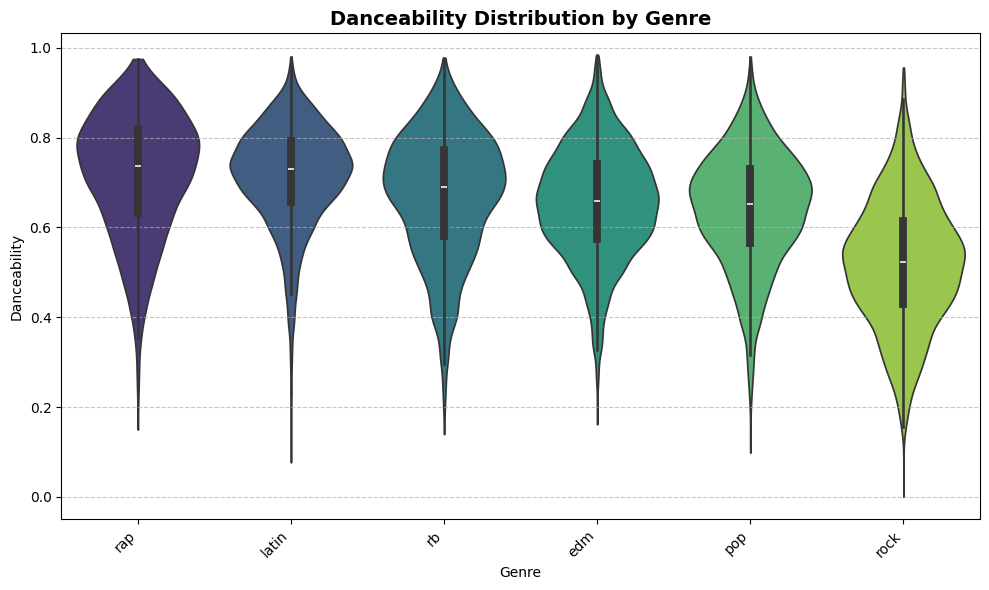

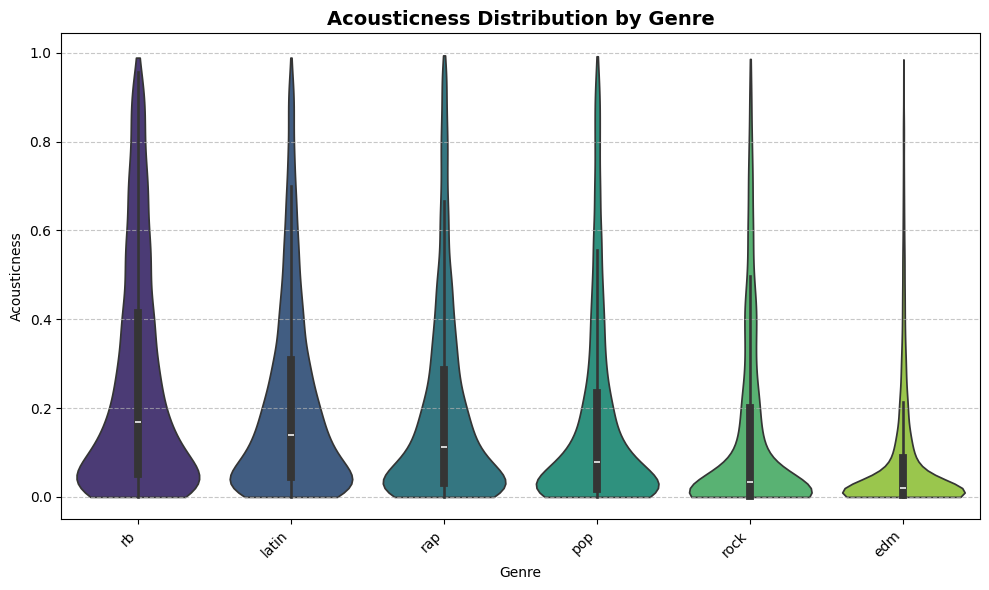

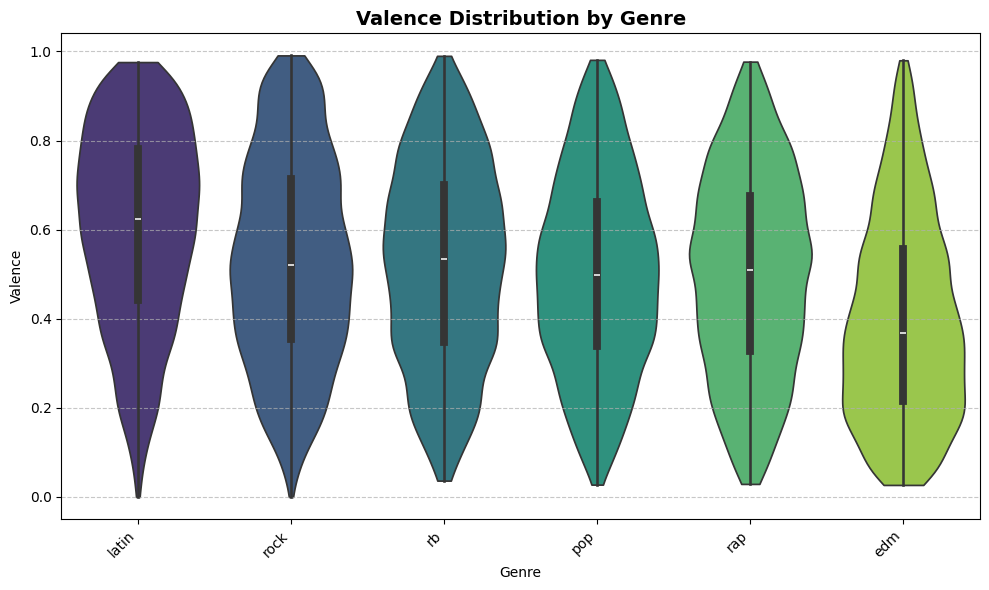

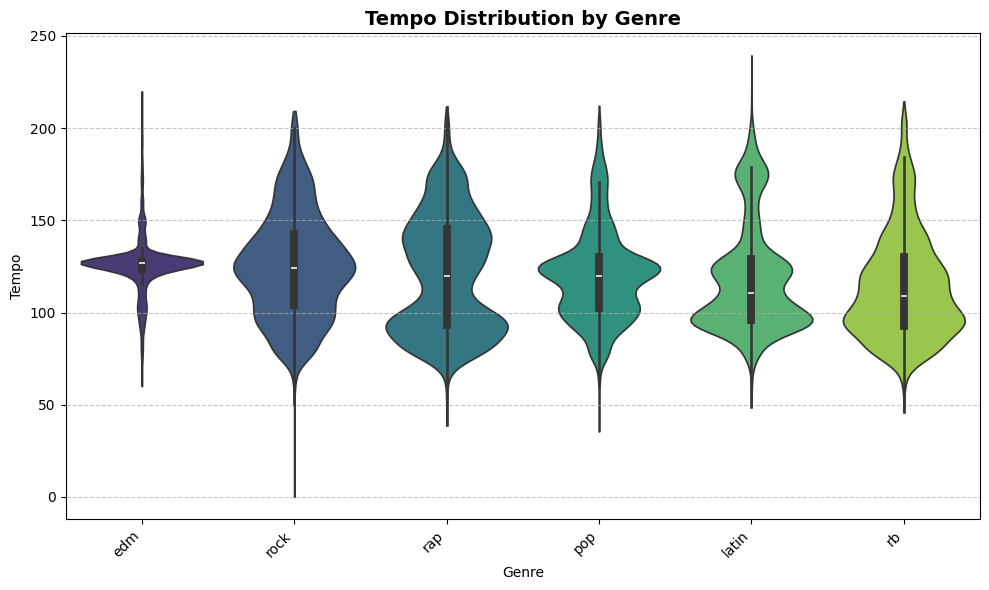

In [ ]:
# Enhanced violin plots for key audio features by genre

import warnings
warnings.filterwarnings("ignore")

key_features = ["energy", "danceability", "acousticness", "valence", "tempo"]

for feature in key_features:
    plt.figure(figsize=(10, 6))

    # Sort genres by mean value of the current feature
    genre_order = (
        df_clean.groupby("playlist_genre")[feature]
        .mean()
        .sort_values(ascending=False)
        .index
    )

    # Draw a violin plot instead of a boxplot
    sns.violinplot(
        data=df_clean,
        x="playlist_genre",
        y=feature,
        order=genre_order,
        palette="viridis",
        inner="box",       # Include a mini boxplot inside each violin
        scale="width",     # Make violin widths comparable
        cut=0              # Prevent violins from extending beyond data range
    )

    # Add titles and labels
    plt.title(f"{feature.capitalize()} Distribution by Genre", fontsize=14, weight="bold")
    plt.xlabel("Genre")
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


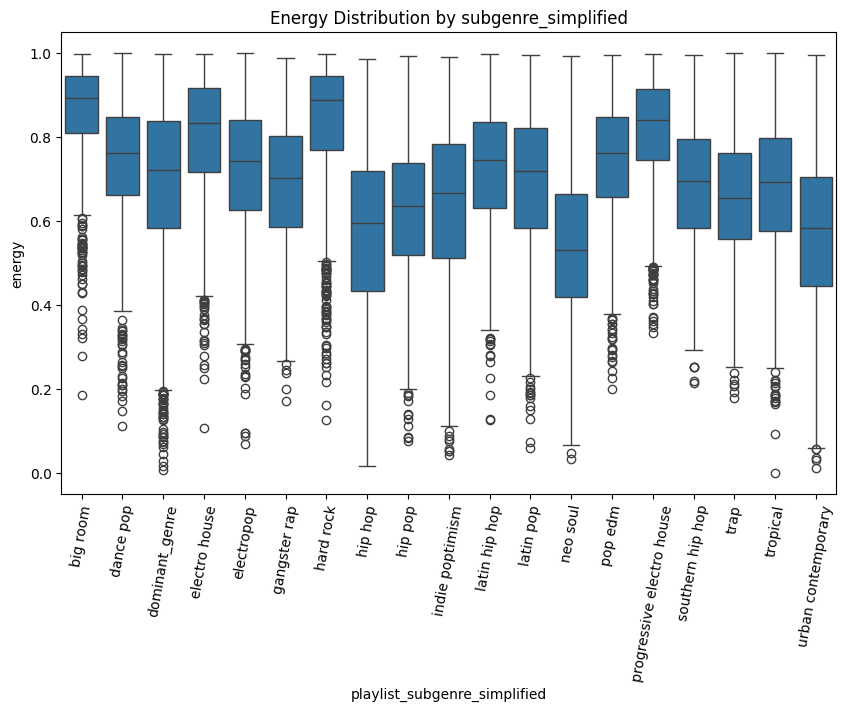

In [ ]:
# Create a boxplot to visualize energy levels across simplified subgenres
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="playlist_subgenre_simplified", y="energy")
plt.title("Energy Distribution by subgenre_simplified")
plt.xticks(rotation=80)
plt.show()

## 6. Correlation and Relationship Analysis

Identify relationships between numerical features and potential multicollinearity.


In [ ]:
con_df.corr()

,danceability,energy,valence,acousticness,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,release_month,release_year,key,track_popularity
danceability,1.000000,-0.086517,0.333786,-0.024705,-0.177476,0.019947,0.173561,-0.010277,-0.126053,-0.093444,0.035549,0.142977,0.013673,0.068846
energy,-0.086517,1.000000,0.148177,-0.540952,0.148106,0.682929,-0.036593,0.033355,0.165137,0.016740,-0.028918,0.032651,0.009043,-0.111947
valence,0.333786,0.148177,1.000000,-0.011451,-0.027393,0.066670,0.071335,-0.179581,-0.022832,-0.039278,-0.059750,-0.206453,0.020094,0.041173
acousticness,-0.024705,-0.540952,-0.011451,1.000000,-0.111437,-0.370313,0.031382,-0.005828,-0.081259,-0.081341,0.025735,0.015574,0.006552,0.086282
tempo,-0.177476,0.148106,-0.027393,-0.111437,1.000000,0.095640,0.050070,0.021178,0.023047,0.001101,0.008970,0.023394,-0.014036,-0.005512
loudness,0.019947,0.682929,0.066670,-0.370313,0.095640,1.000000,-0.001645,-0.156307,0.081187,-0.103518,0.018637,0.265426,-0.000699,0.058671
speechiness,0.173561,-0.036593,0.071335,0.031382,0.050070,-0.001645,1.000000,-0.106194,0.053154,-0.089503,0.008689,0.086119,0.021490,0.011305
instrumentalness,-0.010277,0.033355,-0.179581,-0.005828,0.021178,-0.156307,-0.106194,1.000000,-0.004447,0.066668,0.029765,0.082411,0.004955,-0.157609
liveness,-0.126053,0.165137,-0.022832,-0.081259,0.023047,0.081187,0.053154,-0.004447,1.000000,0.005999,-0.018917,-0.018275,0.002665,-0.055863
duration_ms,-0.093444,0.016740,-0.039278,-0.081341,0.001101,-0.103518,-0.089503,0.066668,0.005999,1.000000,-0.091194,-0.318530,0.013060,-0.141681


In [ ]:
# Identify the strongest correlated feature pairs

# Compute the correlation matrix
corr_matrix = con_df.corr().abs()

# Unstack to get pairs instead of matrix form
corr_pairs = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter only strong correlations (above chosen threshold)
strong_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > 0.5)]

# Display the top correlated feature pairs
print("Top correlated feature pairs (|r| > 0.5):")
print(strong_corr)


Top correlated feature pairs (|r| > 0.5):
loudness  energy          0.682929
energy    acousticness    0.540952
dtype: float64


In [ ]:
# Create a separate copy of the numeric columns for correlation analysis, to avoid modifying the original dataset
num_df = df_clean[numeric_cols].copy()

# Don't drop zero-variance columns
zero_var = [c for c in numeric_cols if num_df[c].nunique(dropna=True) <= 1]
if zero_var:
    print("⚠️ Warning: These columns have zero variance and may produce NaNs in correlation/VIF:", zero_var)


## 6.1 Correlation matrices (Spearman)

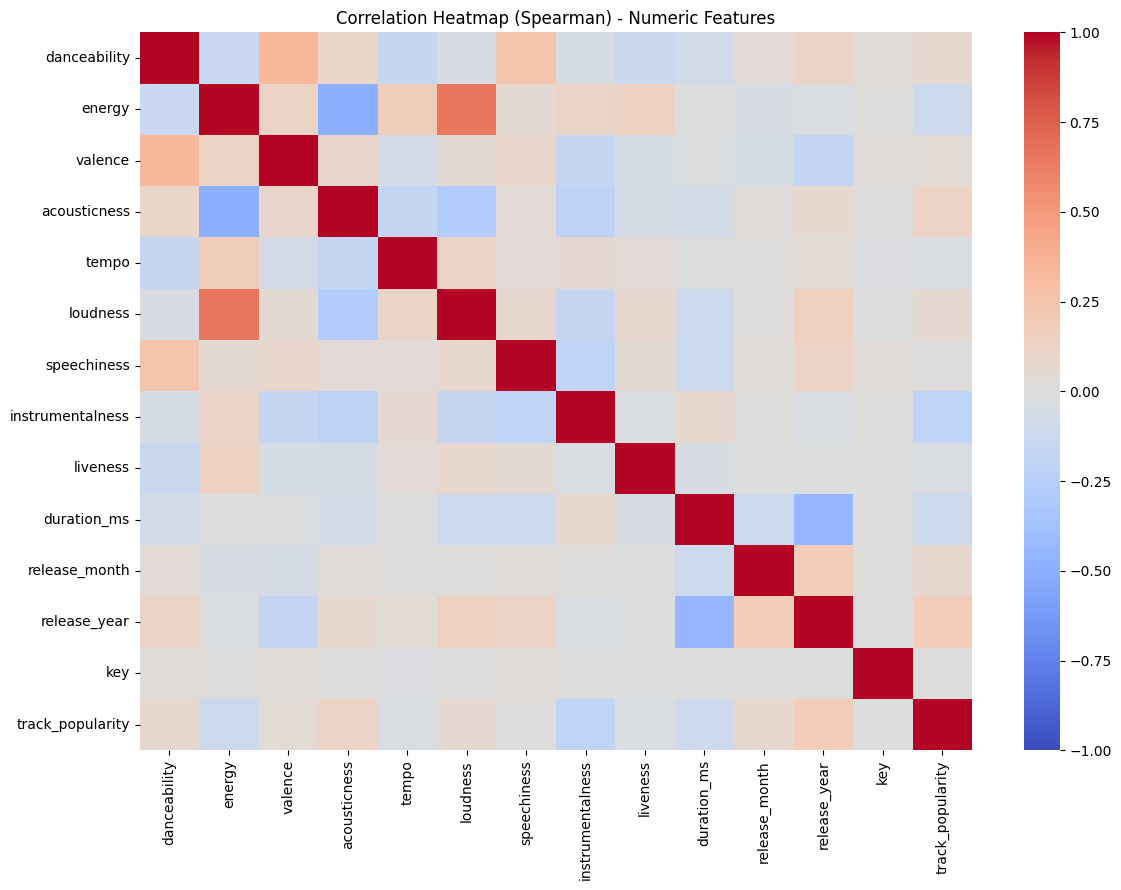

In [ ]:
# Correlation matrices (Spearman)

corr_spearman = num_df.corr(method="spearman")  # monotonic association (rank-based, robust to outliers)

plt.figure(figsize=(12,9))
sns.heatmap(corr_spearman, cmap="coolwarm", vmin=-1, vmax=1, annot=False)
plt.title("Correlation Heatmap (Spearman) - Numeric Features")
plt.tight_layout()
plt.show()


##Strongest Correlated Feature Pairs (Spearman)

Using the Spearman correlation matrix, I identified the strongest monotonic relationships between numerical features.  
This helps detect pairs of variables that move together, which can indicate potential redundancy or multicollinearity in the dataset.


In [ ]:
# 4.2 Rank top correlated feature pairs (absolute correlation)

def top_corr_pairs(corr_df, min_abs=0.50, top_k=30):
    """Return a table of strongest absolute correlations from a correlation matrix."""
    tril = corr_df.where(~np.triu(np.ones(corr_df.shape, dtype=bool)))  # keep lower triangle

    # Flatten the lower triangle into a Series, take absolute values, and sort by strength
    flat = (
        tril.stack()
            .rename("corr")
            .abs()
            .sort_values(ascending=False)
            .reset_index()
    )
    # Rename columns for clarity
    flat.columns = ["feature_1", "feature_2", "abs_corr"]

    # Filter by minimum absolute correlation and return top pairs
    return flat[flat["abs_corr"] >= min_abs].head(top_k)

top_pairs_spearman = top_corr_pairs(corr_spearman, min_abs=0.50, top_k=30)

print("\nTop correlated pairs (Spearman, |ρ| ≥ 0.50):")
display(top_pairs_spearman)


Top correlated pairs (Spearman, |ρ| ≥ 0.50):


,feature_1,feature_2,abs_corr
0,loudness,energy,0.662711


## 6.2 Visual linearity check for selected key pairs

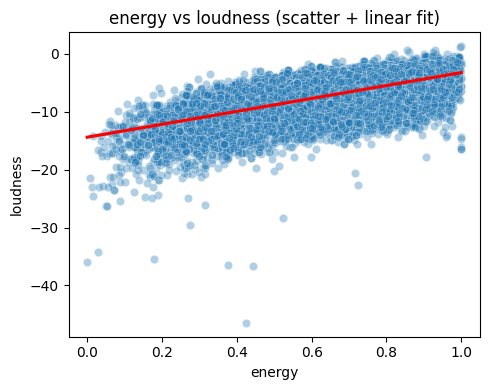

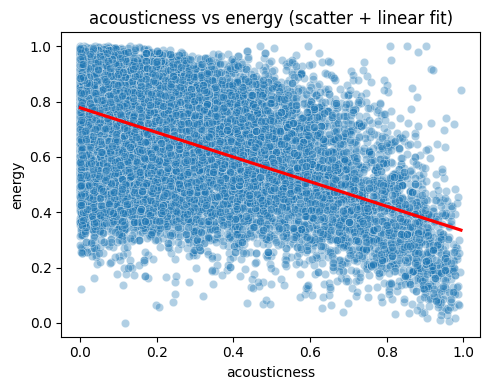

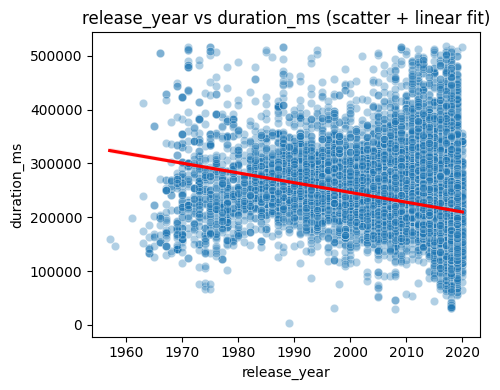

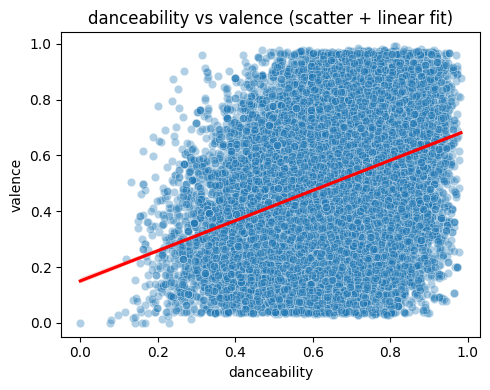

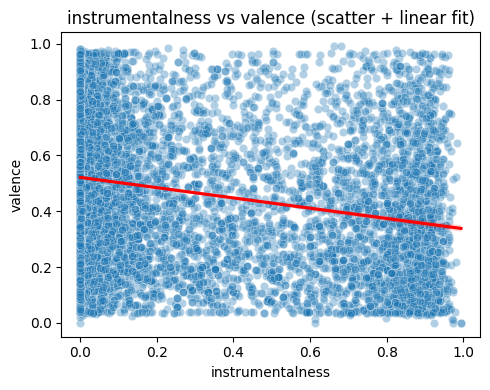

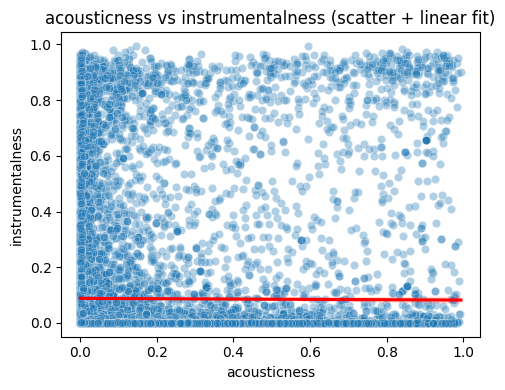

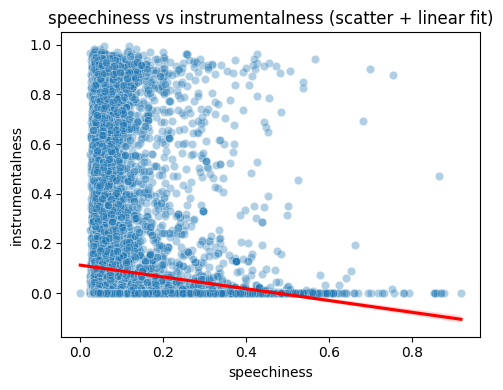

In [ ]:
# 4.3 Visual linearity check for selected key pairs

pairs_to_check = [("energy","loudness"),
                  ("acousticness","energy"),
                  ("release_year","duration_ms"),
                  ("danceability","valence"),
                  ("instrumentalness","valence"),
                  ("acousticness","instrumentalness"),
                  ("speechiness","instrumentalness")]


for x, y in pairs_to_check:
    if x in numeric_cols and y in numeric_cols:
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df_clean, x=x, y=y, alpha=0.35)

        sns.regplot(data=df_clean, x=x, y=y, scatter=False, color="red")
        plt.title(f"{x} vs {y} (scatter + linear fit)")
        plt.tight_layout()
        plt.show()


### Interpretation – Key Feature Relationships and Modeling Impact

The scatterplots reveal clear, monotonic relationships between musical features:  
**Energy ↔ Loudness** (strong positive), **Acousticness ↔ Energy** (negative),  
**Danceability ↔ Valence** (moderate positive), and **Instrumentalness ↔ Valence/Speechiness** (negative).  
These patterns reflect logical musical behavior rather than problematic multicollinearity —  
the features capture related but distinct aspects of songs, confirming the suitability of using **Spearman correlation**
and indicating that no feature removal is needed at this stage.




## 6.3 Kruskal–Wallis Test – Non-parametric Comparison Across Genres

Since most numerical features are not normally distributed,  
the Kruskal–Wallis test (a non-parametric equivalent of ANOVA)  
was used to check whether musical features differ significantly between genres.  
This test ranks the data and compares the median distributions across groups  
without assuming normality or equal variances.


,H-statistic,p-value
danceability,5307.538987,0.000000e+00
energy,4802.015640,0.000000e+00
valence,2180.365009,0.000000e+00
acousticness,3819.794420,0.000000e+00
loudness,2824.489896,0.000000e+00
speechiness,5668.288701,0.000000e+00
instrumentalness,3374.432213,0.000000e+00
duration_ms,1482.039067,0.000000e+00
release_year,4530.313904,0.000000e+00
tempo,1235.093090,7.351330e-265


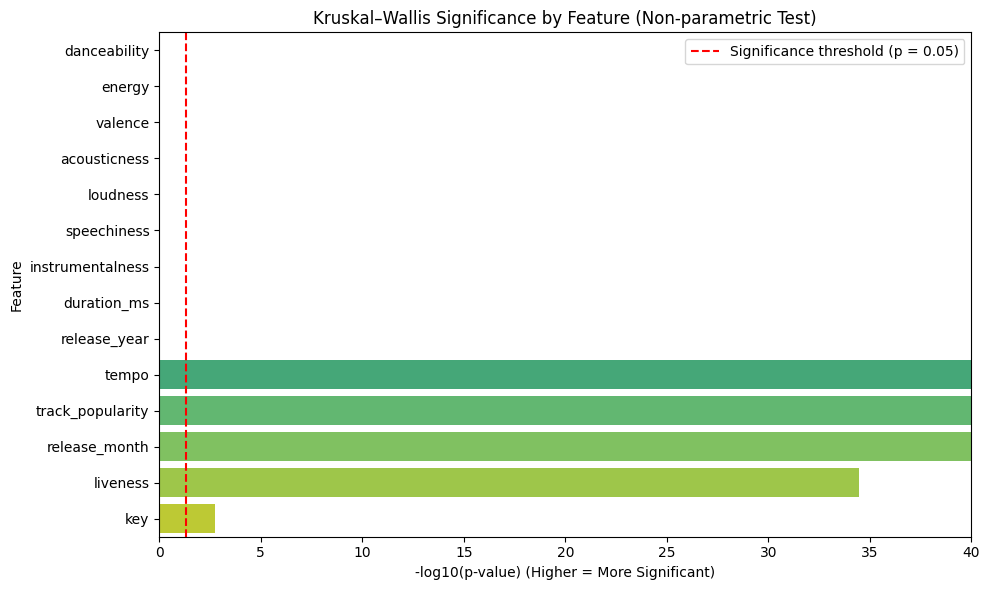

✅ Interpretation:
The Kruskal–Wallis test confirms which numerical features differ significantly across genres.
As with ANOVA, features with smaller p-values (higher bars) show stronger evidence of genre differences.
This non-parametric version is more reliable since most features are not normally distributed.


In [ ]:

#Kruskal–Wallis Test (Non-parametric ANOVA)

from scipy.stats import kruskal


kruskal_results = {}

# Run Kruskal–Wallis test for each numeric feature across genres
for feature in numeric_cols:
    groups = [df_clean[df_clean['playlist_genre'] == g][feature].dropna()
              for g in df_clean['playlist_genre'].unique()]
    if all(len(g) > 1 for g in groups):
        stat, p_val = kruskal(*groups)
        kruskal_results[feature] = {"H-statistic": stat, "p-value": p_val}

# Convert results to a DataFrame and sort by p-value (ascending = more significant)
kruskal_df = pd.DataFrame(kruskal_results).T.sort_values("p-value")
display(kruskal_df)


# Visualization of Kruskal–Wallis Results
# Prepare a tidy frame for plotting
kruskal_df_sorted = kruskal_df.sort_values("p-value", ascending=True).reset_index()
kruskal_df_sorted.rename(columns={'index': 'Feature'}, inplace=True)

# Transform p-values to -log10 scale so smaller p-values appear as taller bars
kruskal_df_sorted["-log10(p-value)"] = -np.log10(kruskal_df_sorted["p-value"])

plt.figure(figsize=(10,6))
sns.barplot(
    data=kruskal_df_sorted,
    x="-log10(p-value)",
    y="Feature",
    palette="viridis"
)

# Add a vertical line at the conventional significance level (p = 0.05)
plt.axvline(-np.log10(0.05), color="red", linestyle="--", label="Significance threshold (p = 0.05)")
plt.title("Kruskal–Wallis Significance by Feature (Non-parametric Test)")
plt.xlabel("-log10(p-value) (Higher = More Significant)")
plt.xlim(0, 40)
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation summary
print("✅ Interpretation:")
print("The Kruskal–Wallis test confirms which numerical features differ significantly across genres.")
print("As with ANOVA, features with smaller p-values (higher bars) show stronger evidence of genre differences.")
print("This non-parametric version is more reliable since most features are not normally distributed.")


### Findings

All numerical features show statistically significant differences (p < 0.05) across genres.  
Even the highest p-values are far below the 0.05 threshold, indicating that every numerical musical attribute varies meaningfully between genres.  

In [ ]:
# Save the final dataframe to a new pickle file

df_clean.to_pickle("/content/drive/MyDrive/pickle_files/final_df_EDA.pkl")

print("✅ Final EDA dataset saved successfully as 'final_df_EDA.pkl'")

✅ Final EDA dataset saved successfully as 'final_df_EDA.pkl'


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30942 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   track_name                    30942 non-null  string  
 1   track_artist                  30942 non-null  string  
 2   track_popularity              30942 non-null  int64   
 3   track_album_name              30942 non-null  string  
 4   playlist_name                 30942 non-null  string  
 5   playlist_genre                30942 non-null  category
 6   danceability                  30942 non-null  float64 
 7   energy                        30942 non-null  float64 
 8   key                           30942 non-null  int64   
 9   loudness                      30942 non-null  float64 
 10  mode                          30942 non-null  category
 11  speechiness                   30942 non-null  float64 
 12  acousticness                  30942 non-null  float